<a href="https://colab.research.google.com/github/Edwina-Yeo/LTCC-Math-Bio/blob/main/Multiple_Scales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: a non-linear elastic pendulum


In this section we will evalutate the solution of the a complex pendulum using Poincaré–Lindstedt method.

We consider Dufffing's equation for a non-linear elastic pendulum:

$y''+y+\epsilon y^3=0$ with initial conditions $y'(0)=0, \ y(0)=1$.

Where $\epsilon$ represents some small amount of nonlinearity from the elasticity of the pendulum.

This is an example of a system in which: we have oscillations with a slowly changing period.


**Activities**

In general, think about the comparitive benefits and drawbacks of solving the model numerically compared to the analytical solution? You do not have to complete these activities in order; you could also do some wider reading and explore other ideas, building from this code or writing new code.


*  Inspect and run the code below, and inspect the output.
* When does the naive solution do well? Up to what time is it valid? How does this time correlate to the theoretical bound of the expansion?
* Can you create a plot of the error that the corrected solution makes compared to the full solution as you vary $\epsilon$?
* In the section below we cover a more general method: the method of multiple scales. This can be applied to Duffing's equation too! Rederive the solution using method of multiple scales. Hint 1: you should use the general solution $y_0(t_1,t_2)=A(t_2)\exp(it_1)+B(t_2)\exp(-it_1)$ rather than $\cos(t_1)$ and $\sin(t_2)$.  Hint 2: it is nicely explained here: https://en.wikipedia.org/wiki/Multiple-scale_analysis#Method_of_multiple_scales


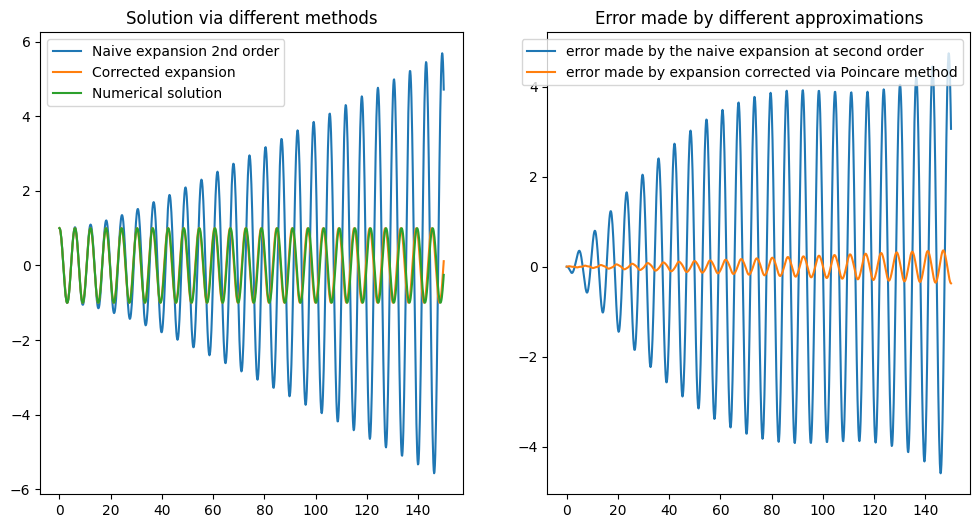

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Duffing equation
def duffing(r, t, eps):
    x, y = r
    dxdt = y
    dydt = -x - eps * (x**3)
    return [dxdt, dydt]

# Parameters
eps = 0.1
t = np.linspace(0, 150, 1000)
initial_conditions = [0, 1]

# Solve ODE
r = odeint(duffing, initial_conditions, t, args=(eps,))

# Plot results
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(t, np.cos(t) + eps * (1/32 * (np.cos(3*t) - np.cos(t)) - 3/8 * t * np.sin(t)), label='Naive expansion 2nd order')
plt.plot(t, np.cos(t*(1+3*eps/8)) + eps * (1/32 * (np.cos(3*t*(1+3*eps/8)) - np.cos(t*(1+3*eps/8)))), label='Corrected expansion')
plt.plot(t, r[:, 1], label='Numerical solution')

plt.legend()
plt.title('Solution via different methods')

# Subplot 2
er_y1 = r[:, 1] - np.cos(t) + eps * (1/32 * (np.cos(3*t) - np.cos(t)) - 3/8 * t * np.sin(t))

er_poincare = r[:, 1] - np.cos(t*(1+3*eps/8)) + eps * (1/32 * (np.cos(3*t*(1+3*eps/8)) - np.cos(t*(1+3*eps/8))))
plt.subplot(1, 2, 2)
plt.plot(t, er_y1, label='error made by the naive expansion at second order')
plt.plot(t, er_poincare, label='error made by expansion corrected via Poincare method')

plt.legend()
plt.title('Error made by different approximations')

plt.show()

# Section 2: Bacterial swimming dynamics:


In this notebook we will evalutate the solution of the bacterial dynamics derived using method of multiple scale. We consider a bacteria which swims at a fixed speed $V$, the swimmer has a prefered angle $\Phi$ at which it swims but it oscillates rapidly around this preferred angle.

This is an example of a system in which: we have periodic fast dynamics and non-periodic slow dynamics.


**Literature:**
* 2D yawing of spheroids: Walker BJ, Ishimoto, K, Gaffney, EA, Moreau, C, Dalwadi, MP. Physical Review Fluids (2022), 7(2): 023101.
*  Method of multiple scales notes - see e.g. Chapter 11 of Bender & Orszag



Full Model

1.  $\frac{dx}{dt}=Vcos(\theta) $

2.  $\frac{dx}{dt}=Vcos(\theta) $

3. $\theta=1+Acos(\omega t) $

We have $\omega\gg1$ so that the angle oscillations are fast.


**Activities**

 You do not have to complete these activities in order; you could also do some wider reading and explore other ideas, building from this code or writing new code.


*  Inspect and run the code below, and inspect the output.
* Can you create a plot of the error that the corrected solution makes compared to the full solution as you vary $\epsilon$?
* The effective speed of the swimmer is $V_{eff}=VJ_0(A)$, at what amplitude of oscillations $A$ is the swimmer fastest?
* Examine the sign of $J_0(A)$ for $A\in[0,2\pi)$, what does this mean for the effective behaviour of the swimmer?


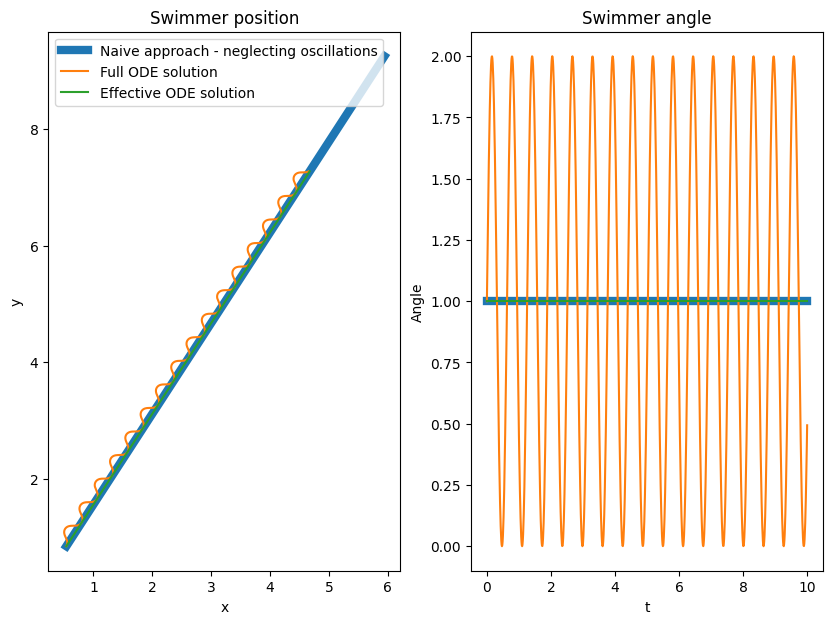

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import jv as besselj


# Model parameters
A = 1  # Amplitude of angle oscillations
omega = 10  # Timescale of swimmer orientation oscillations - must be large
V = 1  # Swimmer speed

# Define the effective and full ODE functions
def effective(t,y):
    return [V * np.cos(1), V * np.sin(1)]

def full(t,y):
    # print(omega)
    A = 1  # Amplitude of angle oscillations
    omega = 10  # Timescale of swimmer orientation oscillations - must be large
    V = 1  # Swimmer speed
    return [V * np.cos(1 + A * np.sin(omega * t)), V * np.sin(1 + A * np.sin(omega * t))]

# Naive approach where we neglect angle oscillations
t = np.linspace(0, 10, 1000)

sol_naive =  solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r_naive=sol_naive.y

# Solve the ODE numerically
sol = solve_ivp(full,[0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r=sol.y

# Solve the dynamics of the swimmers using effective model
V=V * besselj(0, A)
sol_eff = solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r_eff=sol_eff.y

# Plotting
plt.figure(figsize=(10,7))

plt.subplot(1, 2, 1)
plt.plot(r_naive[ 0,:], r_naive[1,:], linewidth=6, label='Naive approach - neglecting oscillations')
plt.plot(r[0,:], r[ 1,:], label='Full ODE solution')
plt.plot(r_eff[0,:], r_eff[1,:], label='Effective ODE solution')
plt.legend()
plt.title('Swimmer position')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(t, np.ones_like(t), linewidth=6, label='Constant angle')
plt.plot(t, 1 + A * np.sin(omega * t), label='Oscillating angle')
plt.plot(t, np.ones_like(t), label='Constant angle')
plt.ylabel('Angle')
plt.xlabel('t')
plt.title('Swimmer angle')
plt.show()